<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="center"><font color=white>VISUALISASI DATA PREDIKSI PEROKOK BERDASARKAN DATA MEDICAL PERSONAL COST MENGGUNAKAN MODEL KLASIFIKASI NAIVE BAYES</font></h2>


<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Data Source:</font></h2>

* https://www.kaggle.com/datasets/mirichoi0218/insurance

# Data Preprocessing

<div style="border-radius:10px; padding: 15px; background-color: #C02929; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Objecttives:

1. Install Libraries
2. Import Libraries
3. Load Dataset
4. Data Exploration
5. Data Quality
  - Penanganan Nilai yang Hilang
  - Penanganan Format yang sesuai standard

</font></h3>






# Step 1 | Install Libraries

In [ ]:
#Menginstall library pandas, numpy, scikit-learn, matplotlib, seaborn
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Step 2 | Import Libraries


In [ ]:
# import library pandas, numpy, sklearn, matplotlib, seaborn
import numpy as np #mengolah data berbentuk matriks & vektor
import pandas as pd #mengolah data berbentuk tabel

# For Data Preprocessing
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# For Data Classification
from sklearn.preprocessing import LabelEncoder #mengubah data kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #membagi data menjadi data latih & data uji
from sklearn.preprocessing import StandardScaler #standarisasi data
from sklearn.naive_bayes import GaussianNB #metode naive bayes
from sklearn.metrics import confusion_matrix, accuracy_score #evaluasi metode naive bayes
from sklearn.metrics import classification_report #evaluasi metode naive bayes

# Step 3 | Load Dataset

In [ ]:
# load dataset menggunakan pandas dengan dataset data insurance
dataset = pd.read_csv('/content/Medical Personal Cost Datasets.csv')

In [ ]:
# Menampilkan semua data
dataset

,age,sex,bmi,region,charges,children,smoker
0,19,female,27.900,southwest,16884.92400,0,yes
1,18,male,33.770,southeast,1725.55230,1,no
2,28,male,33.000,southeast,4449.46200,3,no
3,33,male,22.705,northwest,21984.47061,0,no
4,32,male,28.880,northwest,3866.85520,0,no
...,...,...,...,...,...,...,...
1333,50,male,30.970,northwest,10600.54830,3,no
1334,18,female,31.920,northeast,2205.98080,0,no
1335,18,female,36.850,southeast,1629.83350,0,no
1336,21,female,25.800,southwest,2007.94500,0,no


In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'region', 'charges', 'children', 'smoker'], dtype='object')

<!DOCTYPE html>
<html>
<head>
  <style>
    table, th, td {
      border: 1px solid black;
      border-collapse: collapse;
    }
    th, td {
      padding: 10px;
      text-align: left;
    }
  </style>
</head>
<body>

  <h2>Dataset Description:</h2>

  <table>
    <tr>
      <th>Variable</th>
      <th>Description</th>
    </tr>
    <tr>
      <td>age</td>
      <td>Ini adalah umur dari penerima manfaat utama (biasanya orang yang terdaftar dalam asuransi kesehatan).</td>
    </tr>
    <tr>
      <td>sex</td>
      <td>Jenis kelamin kontraktor asuransi (perempuan atau laki-laki)</td>
    </tr>
    <tr>
      <td>bmi</td>
      <td>Ini adalah Indeks Massa Tubuh (IMT) yang memberikan pemahaman tentang berat tubuh relatif terhadap tinggi badan.<br>
      Cara menghitungnya adalah dengan membagi berat badan (kg) dengan kuadrat tinggi badan (m^2). Nilai BMI yang ideal biasanya antara 18.5 hingga 24.9.<br>
      Jika lebih rendah atau lebih tinggi, bisa menunjukkan kondisi tubuh yang kurang sehat (misalnya, kurang gizi atau obesitas).</td>
    </tr>
    <tr>
      <td>region</td>
      <td>Wilayah tempat tinggal penerima manfaat di AS (Northeast, Southeast, Southwest, Northwest).</td>
    </tr>
    <tr>
      <td>children</td>
      <td>Jumlah anak atau tanggungan yang dilindungi asuransi.</td>
    </tr>
    <tr>
      <td>charges</td>
      <td>Biaya medis yang dibebankan oleh asuransi kesehatan.</td>
    </tr>
    <tr>
      <td>smoker</td>
      <td>Status merokok (ya atau tidak).</td>
    </tr>
  </table>

</body>
</html>

# Step 4 | Data Exploration /Data Understanding

In [ ]:
# Menampilkan semua data
dataset

,age,sex,bmi,region,charges,children,smoker
0,19,female,27.900,southwest,16884.92400,0,yes
1,18,male,33.770,southeast,1725.55230,1,no
2,28,male,33.000,southeast,4449.46200,3,no
3,33,male,22.705,northwest,21984.47061,0,no
4,32,male,28.880,northwest,3866.85520,0,no
...,...,...,...,...,...,...,...
1333,50,male,30.970,northwest,10600.54830,3,no
1334,18,female,31.920,northeast,2205.98080,0,no
1335,18,female,36.850,southeast,1629.83350,0,no
1336,21,female,25.800,southwest,2007.94500,0,no


In [ ]:
# Menampilkan baris pertama
dataset.head()

,age,sex,bmi,region,charges,children,smoker
0,19,female,27.900,southwest,16884.92400,0,yes
1,18,male,33.770,southeast,1725.55230,1,no
2,28,male,33.000,southeast,4449.46200,3,no
3,33,male,22.705,northwest,21984.47061,0,no
4,32,male,28.880,northwest,3866.85520,0,no


In [ ]:
# Menampilkan baris terakhir
dataset.tail()

,age,sex,bmi,region,charges,children,smoker
1333,50,male,30.97,northwest,10600.5483,3,no
1334,18,female,31.92,northeast,2205.9808,0,no
1335,18,female,36.85,southeast,1629.8335,0,no
1336,21,female,25.80,southwest,2007.9450,0,no
1337,61,female,29.07,northwest,29141.3603,0,yes


In [ ]:
# Menampilkan rincian dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   region    1338 non-null   object 
 4   charges   1338 non-null   float64
 5   children  1338 non-null   int64  
 6   smoker    1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Menampilkan ringkasan statistik deskriptif
dataset.describe()

,age,bmi,charges,children
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265,1.094918
std,14.049960,6.098187,12110.011237,1.205493
min,18.000000,15.960000,1121.873900,0.000000
25%,27.000000,26.296250,4740.287150,0.000000
50%,39.000000,30.400000,9382.033000,1.000000
75%,51.000000,34.693750,16639.912515,2.000000
max,64.000000,53.130000,63770.428010,5.000000


In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'region', 'charges', 'children', 'smoker'], dtype='object')

In [ ]:
# Menampilkan spesifik kolom/atribut 'age', 'sex', 'bmi', 'charges', 'children', 'smoker'
dataset[['age', 'sex', 'bmi', 'charges', 'children', 'smoker']]

,age,sex,bmi,charges,children,smoker
0,19,female,27.900,16884.92400,0,yes
1,18,male,33.770,1725.55230,1,no
2,28,male,33.000,4449.46200,3,no
3,33,male,22.705,21984.47061,0,no
4,32,male,28.880,3866.85520,0,no
...,...,...,...,...,...,...
1333,50,male,30.970,10600.54830,3,no
1334,18,female,31.920,2205.98080,0,no
1335,18,female,36.850,1629.83350,0,no
1336,21,female,25.800,2007.94500,0,no


# Step 5 | Data Quality

In [ ]:
# Mengecek nilai yang hilang
dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
region,0
charges,0
children,0
smoker,0


In [ ]:
# Mengecek Data Duplikat
dataset.duplicated().sum()

np.int64(1)

In [ ]:
# Menghapus data duplikat
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   region    1337 non-null   object 
 4   charges   1337 non-null   float64
 5   children  1337 non-null   int64  
 6   smoker    1337 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
print('Data duplikat setelah dibersihkan : ')
dataset.duplicated().sum()

Data duplikat setelah dibersihkan : 


np.int64(0)

<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

* _Tidak ada data yang hilang_

In [ ]:
# Mengidentifikasi dan mengembalikan semua nilai unik yang ada di dalam kolom deskriptif
region_unique = dataset['region'].unique()
sex_unique = dataset['sex'].unique()
smoke_unique = dataset['smoker'].unique()

print("Unique values in 'region':", region_unique)
print("Unique values in 'sex':", sex_unique)
print("Unique values in 'smoker':", smoke_unique)

Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']
Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']


In [ ]:
# Menampilkan informasi ttg dataframe (jmlh baris & kolom, tipe data & jmlh nilai yg hilang)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   region    1337 non-null   object 
 4   charges   1337 non-null   float64
 5   children  1337 non-null   int64  
 6   smoker    1337 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# Encode categorical variables
# Mengubah nilai dalam kolom variable menjadi nilai numerik
en = LabelEncoder()
dataset['sex'] = en.fit_transform(dataset['sex'])
dataset['region'] = en.fit_transform(dataset['region'])
dataset['smoker'] = en.fit_transform(dataset['smoker'])

display(dataset)

,age,sex,bmi,region,charges,children,smoker
0,19,0,27.900,3,16884.92400,0,1
1,18,1,33.770,2,1725.55230,1,0
2,28,1,33.000,2,4449.46200,3,0
3,33,1,22.705,1,21984.47061,0,0
4,32,1,28.880,1,3866.85520,0,0
...,...,...,...,...,...,...,...
1333,50,1,30.970,1,10600.54830,3,0
1334,18,0,31.920,0,2205.98080,0,0
1335,18,0,36.850,2,1629.83350,0,0
1336,21,0,25.800,3,2007.94500,0,0


In [ ]:
# Mengidentifikasi dan mengembalikan semua nilai unik yang ada di dalam kolom deskriptif setelah encode
region_unique = dataset['region'].unique()
sex_unique = dataset['sex'].unique()
smoke_unique = dataset['smoker'].unique()

print("Unique values in 'region':", region_unique)
print("Unique values in 'sex':", sex_unique)
print("Unique values in 'smoker':", smoke_unique)

Unique values in 'region': [3 2 1 0]
Unique values in 'sex': [0 1]
Unique values in 'smoker': [1 0]


<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

* _Mengubah isi variable ke dalam numerik_

In [ ]:
# Mengubah nilai dalam kolom menjadi nilai dengan 2 angka di belakang koma
dataset['age'] = dataset['age'].round(0)
dataset['sex'] = dataset['sex'].round(0)
dataset['bmi'] = dataset['bmi'].round(0)
dataset['region'] = dataset['region'].round(0)
dataset['charges'] = dataset['charges'].round(0)
dataset['children'] = dataset['children'].round(0)
dataset['smoker'] = dataset['smoker'].round(0)

display(dataset)

,age,sex,bmi,region,charges,children,smoker
0,19,0,28.0,3,16885.0,0,1
1,18,1,34.0,2,1726.0,1,0
2,28,1,33.0,2,4449.0,3,0
3,33,1,23.0,1,21984.0,0,0
4,32,1,29.0,1,3867.0,0,0
...,...,...,...,...,...,...,...
1333,50,1,31.0,1,10601.0,3,0
1334,18,0,32.0,0,2206.0,0,0
1335,18,0,37.0,2,1630.0,0,0
1336,21,0,26.0,3,2008.0,0,0


In [ ]:
# Download Excel untuk codingan membersihkan data
dataset.to_excel('Data bersih.xlsx')

# Data Classification Naive Bayes

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   region    1337 non-null   int64  
 4   charges   1337 non-null   float64
 5   children  1337 non-null   int64  
 6   smoker    1337 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [ ]:
dataset.empty

False

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>

 Menggunakan gejala dan karakteristik pasien (x) untuk memprediksi status merokok mereka (y), yaitu apakah mereka perokok atau bukan.



In [ ]:
print (x)

[[1.9000e+01 0.0000e+00 2.8000e+01 3.0000e+00 1.6885e+04 0.0000e+00]
 [1.8000e+01 1.0000e+00 3.4000e+01 2.0000e+00 1.7260e+03 1.0000e+00]
 [2.8000e+01 1.0000e+00 3.3000e+01 2.0000e+00 4.4490e+03 3.0000e+00]
 ...
 [1.8000e+01 0.0000e+00 3.7000e+01 2.0000e+00 1.6300e+03 0.0000e+00]
 [2.1000e+01 0.0000e+00 2.6000e+01 3.0000e+00 2.0080e+03 0.0000e+00]
 [6.1000e+01 0.0000e+00 2.9000e+01 1.0000e+00 2.9141e+04 0.0000e+00]]


In [ ]:
# yes no smoker
print (y)

[1 0 0 ... 0 0 1]


In [ ]:
#Membagi Data set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  1069
x_test =  268
y_train =  1069
y_test =  268


In [ ]:
# Data Transformation
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children', 'charges']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

print("Hasil Transformasi DataFrame:")
print(dataset)

Hasil Transformasi DataFrame:
           age  sex       bmi  region   charges  children  smoker
0    -1.440418    0 -0.436914       3  0.297864 -0.909234       1
1    -1.511647    1  0.547338       2 -0.954343 -0.079442       0
2    -0.799350    1  0.383296       2 -0.729410  1.580143       0
3    -0.443201    1 -1.257124       1  0.719066 -0.909234       0
4    -0.514431    1 -0.272872       1 -0.777486 -0.909234       0
...        ...  ...       ...     ...       ...       ...     ...
1333  0.767704    1  0.055212       1 -0.221225  1.580143       0
1334 -1.511647    0  0.219254       0 -0.914693 -0.909234       0
1335 -1.511647    0  1.039464       2 -0.962273 -0.909234       0
1336 -1.297958    0 -0.764998       3 -0.931048 -0.909234       0
1337  1.551231    0 -0.272872       1  1.310268 -0.909234       1

[1337 rows x 7 columns]


In [ ]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-1.1576804 ,  0.97140947, -0.91433819, -1.38394601, -0.90882277,
        -0.90790804],
       [-1.30061876,  0.97140947, -0.74912056, -1.38394601, -0.83327408,
         0.7669042 ],
       [ 0.91492586, -1.029432  ,  1.23349106, -0.47798258,  1.74700402,
         0.7669042 ],
       ...,
       [-1.37208794,  0.97140947, -1.4099911 ,  1.33394429, -0.94565702,
        -0.07050192],
       [-0.08564268, -1.029432  , -0.41868529,  1.33394429, -0.50244948,
         1.60431032],
       [-0.30005022, -1.029432  ,  0.90305579,  0.42798086, -0.61474695,
         0.7669042 ]])

In [ ]:
x_test

array([[ 0.70051832,  0.97140947, -1.24477346, -1.38394601, -0.37100844,
        -0.90790804],
       [-0.72886531, -1.029432  , -0.74912056,  1.33394429, -0.62568613,
         2.44171645],
       [ 0.84345668, -1.029432  ,  0.90305579, -0.47798258, -0.13615801,
         1.60431032],
       ...,
       [-1.22914958, -1.029432  ,  0.73783816, -1.38394601, -0.77806543,
         0.7669042 ],
       [ 1.5581485 ,  0.97140947,  0.90305579,  1.33394429,  2.93766494,
        -0.07050192],
       [ 0.55757996, -1.029432  , -1.07955583, -1.38394601, -0.38416964,
        -0.90790804]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
# Membuat dan melatih model machine learning untuk melakukan klasifikasi menggunakan algoritma Gaussian Naive Bayes.
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0])

In [ ]:
classifier.predict_proba(x_test)

array([[9.78859948e-01, 2.11400516e-02],
       [9.91182872e-01, 8.81712777e-03],
       [9.77230191e-01, 2.27698093e-02],
       [3.01447051e-05, 9.99969855e-01],
       [9.86874229e-01, 1.31257712e-02],
       [9.76589386e-01, 2.34106137e-02],
       [5.18615206e-05, 9.99948138e-01],
       [9.92632932e-01, 7.36706761e-03],
       [9.88826073e-01, 1.11739272e-02],
       [9.71735672e-01, 2.82643279e-02],
       [9.61066891e-01, 3.89331085e-02],
       [2.06627881e-01, 7.93372119e-01],
       [7.11398112e-05, 9.99928860e-01],
       [9.69985943e-01, 3.00140565e-02],
       [2.16774965e-01, 7.83225035e-01],
       [9.81048880e-01, 1.89511204e-02],
       [9.88881527e-01, 1.11184726e-02],
       [3.14891638e-05, 9.99968511e-01],
       [9.86849008e-01, 1.31509924e-02],
       [9.91659437e-01, 8.34056327e-03],
       [9.92996408e-01, 7.00359195e-03],
       [5.34773142e-01, 4.65226858e-01],
       [9.82661016e-01, 1.73389841e-02],
       [5.14171488e-01, 4.85828512e-01],
       [1.446766

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[201   7]
 [ 14  46]]


<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="left"><font color=white>Keterangan:</font></h2>
[[201   7]
 [ 14  46]] = [[TP FP]
 [FN TN]]

Apakah seseorang merokok atau tidak?
* (TP) : berapa banyak orang yang benar diprediksi sebagai perokok.
* (TN) : berapa banyak yang benar diprediksi sebagai bukan perokok.
* (FP) : berapa banyak yang salah diprediksi sebagai perokok.
* (FN) : berapa banyak yang salah diprediksi sebagai bukan perokok.



In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       208
           1       0.87      0.77      0.81        60

    accuracy                           0.92       268
   macro avg       0.90      0.87      0.88       268
weighted avg       0.92      0.92      0.92       268



In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 92 persen


In [ ]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y_pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
263,0,0
264,0,0
265,0,0
266,1,1


# Data Visualization

# Visualisasi 1 | Klasifikasi Perokok

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   float64
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   region    1337 non-null   int64  
 4   charges   1337 non-null   float64
 5   children  1337 non-null   float64
 6   smoker    1337 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 83.6 KB


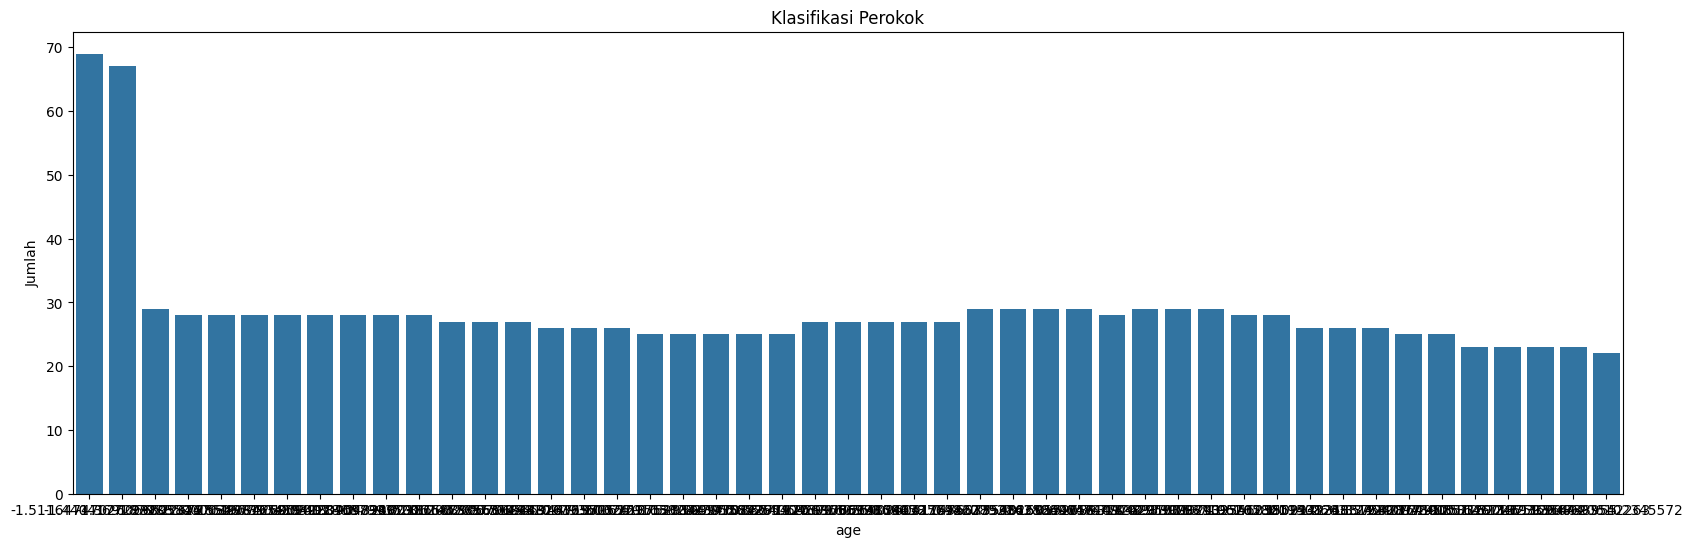

In [ ]:
dataset.info()
dataset.empty

plt.figure(figsize=(20, 6))
sns.countplot(x='age', data=dataset)
plt.title('Klasifikasi Perokok')
plt.xlabel('age')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi 2 | Menggunakan Confusion Matrics untuk Naive Bayes

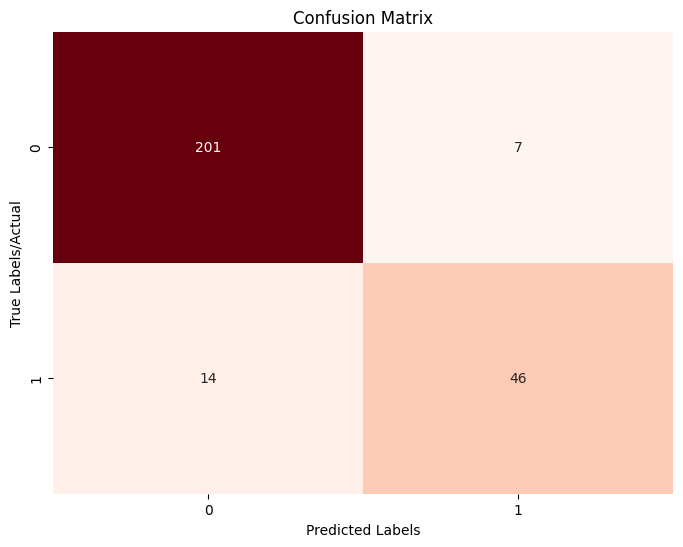

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels/Actual')
plt.show()

# Visualisasi 3 | Hubungan Antara Kebiasaan Merokok dan Biaya Medis (charges)

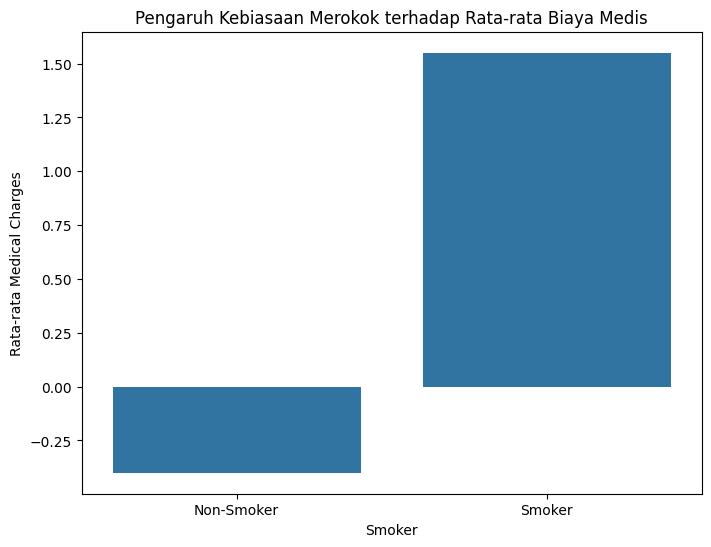

In [ ]:
# Menghitung rata-rata biaya medis berdasarkan status perokok
avg_charges_smoker = dataset.groupby('smoker')['charges'].mean().reset_index()

# Membuat barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=avg_charges_smoker)

# Menambahkan judul dan label
plt.title('Pengaruh Kebiasaan Merokok terhadap Rata-rata Biaya Medis')
plt.xlabel('Smoker')
plt.ylabel('Rata-rata Medical Charges')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])  # Label lebih jelas
plt.show()

# Visualisasi 4 | Analisis Biaya Medis Berdasarkan Jenis Kelamin dan Kebiasaan Merokok

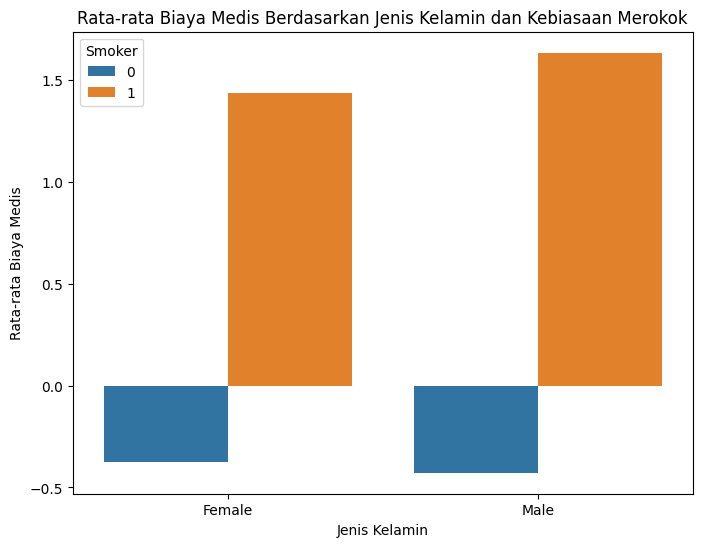

In [ ]:
# Kelompokkan data berdasarkan jenis kelamin dan kebiasaan merokok
avg_charges = dataset.groupby(['sex', 'smoker'])['charges'].mean().reset_index()

# Buat barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', hue='smoker', data=avg_charges)

# Menambahkan judul dan label
plt.title('Rata-rata Biaya Medis Berdasarkan Jenis Kelamin dan Kebiasaan Merokok')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Biaya Medis')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # Memberi label yang jelas
plt.legend(title='Smoker')
plt.show()

# Visualisalisasi 5 | Interaksi antara BMI, kebiasaan merokok, dan biaya medis

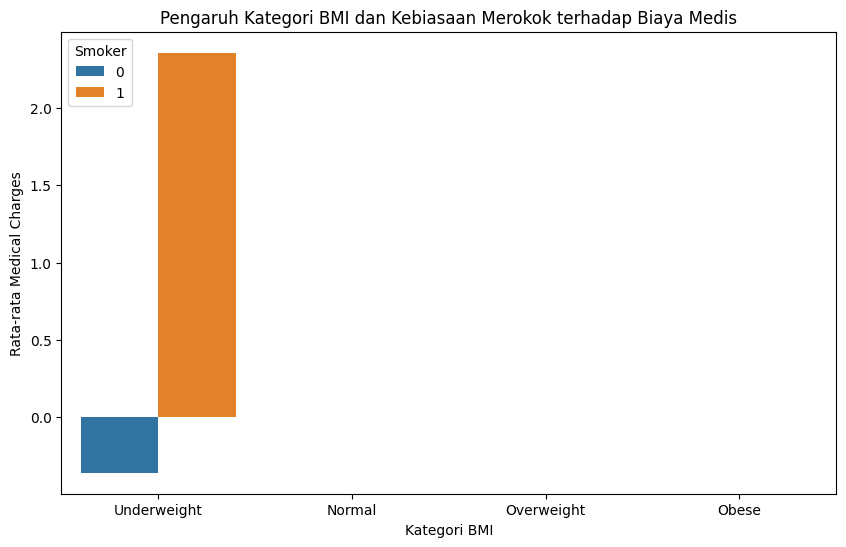

In [ ]:
# Membuat kategori BMI berdasarkan nilai
bins = [0, 18.5, 24.9, 29.9, 40]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
dataset['bmi_category'] = pd.cut(dataset['bmi'], bins=bins, labels=labels)

# Menghitung rata-rata biaya medis berdasarkan kategori BMI dan kebiasaan merokok
avg_charges_bmi = dataset.groupby(['bmi_category', 'smoker'], observed=False)['charges'].mean().reset_index()

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_category', y='charges', hue='smoker', data=avg_charges_bmi)

# Menambahkan judul dan label
plt.title('Pengaruh Kategori BMI dan Kebiasaan Merokok terhadap Biaya Medis')
plt.xlabel('Kategori BMI')
plt.ylabel('Rata-rata Medical Charges')
plt.legend(title='Smoker', loc='upper left')
plt.show()